In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [7]:
titanic_data = pd.read_csv("train.csv")

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#сколько пропущено значений в каждом признаке
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
X = titanic_data.drop(["PassengerId", "Name","Ticket", "Cabin", "Survived"], axis = 1)
#конвертируем все строки в числа для корректной работы классификатора
X = pd.get_dummies(X)
#пропущенные значения заменяем на медианный возраст пассажиров
X = X.fillna({"Age" : X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
y = titanic_data.Survived

In [12]:
clsf = tree.DecisionTreeClassifier(criterion="entropy")

In [13]:
clsf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(3492.428337545956, 1325.025, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(2260.0634765625, 1257.075, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(1158.2795266544117, 1189.125, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(461.5808823529412, 1121.175, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(420.5514705882353, 1053.225, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(379.52205882352945, 985.275, 'SibSp <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(338.49264705882354, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(420.5514705882353, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(461.5808823529412, 985.275, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(502.6102941176471, 1053.225, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1854.9781709558824, 1121.175, 'Embarked_C <= 0.5\nentr

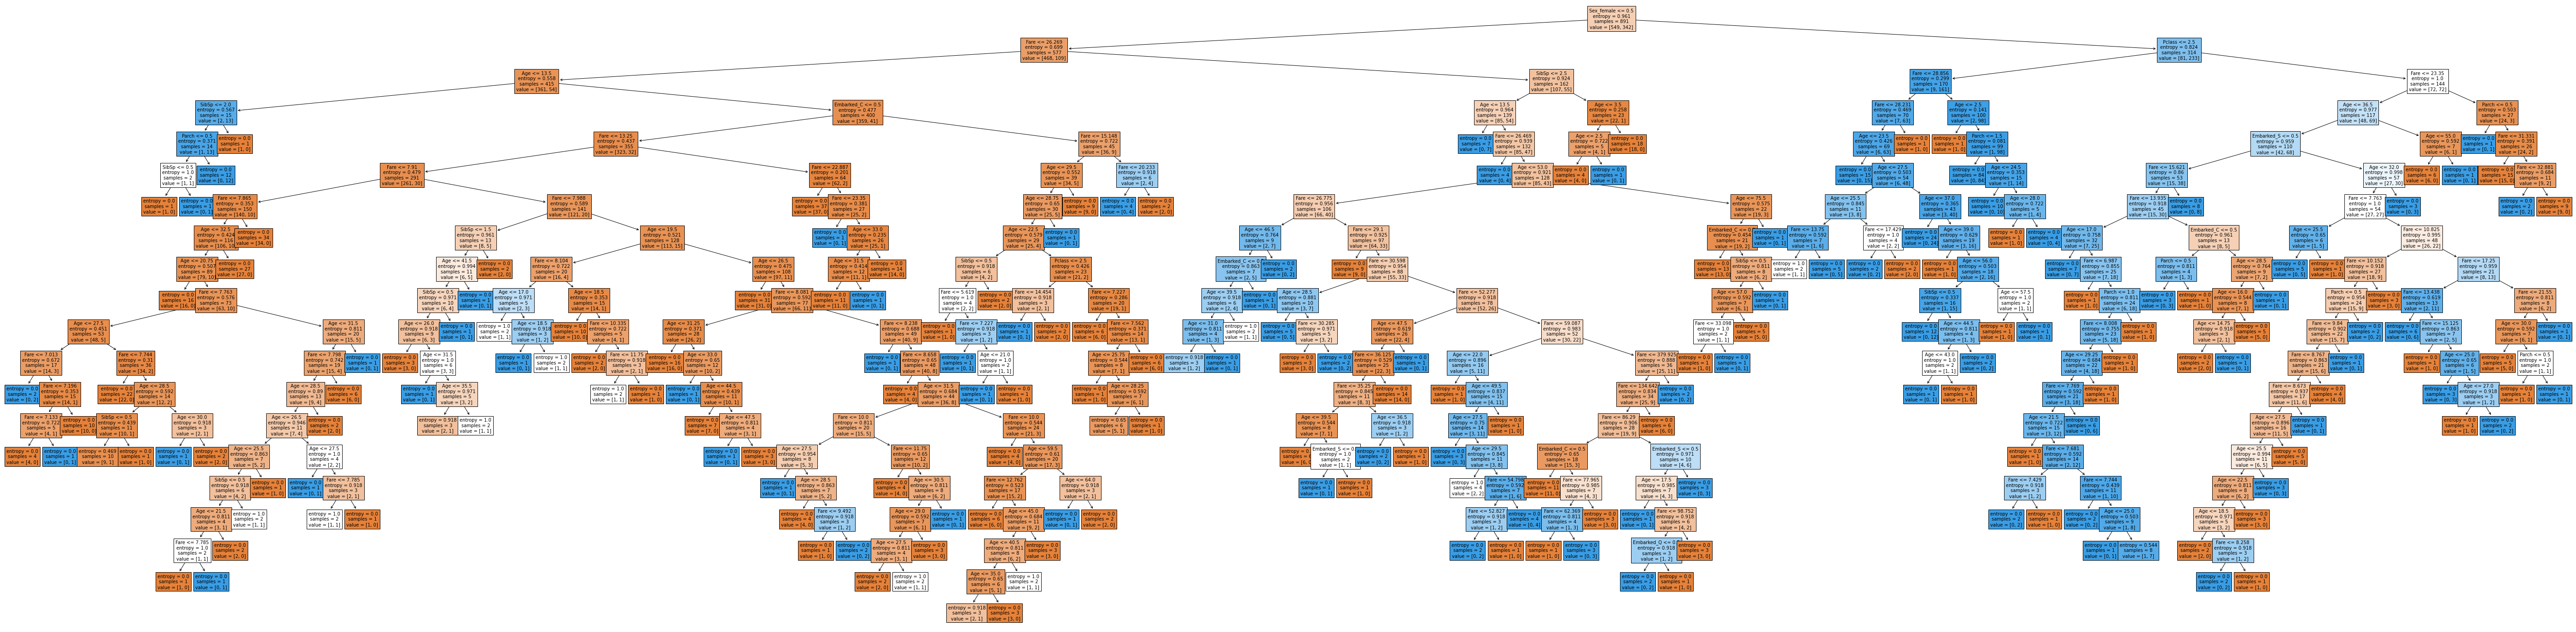

In [14]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clsf, fontsize=10, feature_names=list(X), filled=True)

# Сверху получилась т.н. проблема "переобучения"

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
clsf.score(X,y)

0.9797979797979798

In [17]:
clsf.fit(X_train, y_train)
clsf.score(X_train, y_train)

0.9798657718120806

In [18]:
clsf.score(X_test, y_test)

0.7694915254237288

In [19]:
clsf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clsf.fit(X_train, y_train)
#посмотрим, как улучшилось кач-во модели для тестовых данных
clsf.score(X_train,y_train)

0.8238255033557047

In [20]:
clsf.score(X_test, y_test)

0.8203389830508474

In [21]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    "cross_val_score" : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.803754


In [22]:
#грубо говоря "сплавили" две колонки в одну с указанием test или train - score
scores_data_long = pd.melt(scores_data, 
                           id_vars = ["max_depth"], 
                           value_vars = ["train_score", "test_score","cross_val_score"], 
                           var_name = "set_type",
                           value_name = "score")
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


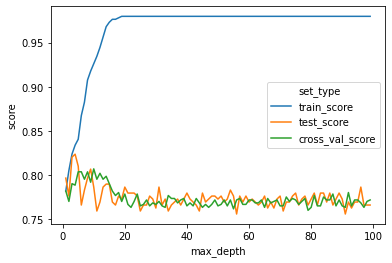

In [23]:
sns.lineplot(x = "max_depth", y = "score", hue = "set_type", data = scores_data_long)

# Разбираем GridSearchCV

In [24]:
from sklearn.model_selection import cross_val_score
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.7864406779661017

In [25]:
clf1 = tree.DecisionTreeClassifier()
parameters = {"criterion": ["gini", "entropy"], "max_depth": range(1,30)}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
gridsearch_clf = GridSearchCV(clf1, parameters, cv = 5)
gridsearch_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [28]:
gridsearch_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [29]:
best_clf = gridsearch_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [30]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [31]:
y_pred = best_clf.predict(X_test)

In [32]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

0.8023255813953488

In [33]:
recall_score(y_test,y_pred)

0.575

In [34]:
#вероятность отнесения к отрицательному(слева) и положительному (справа) классам
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

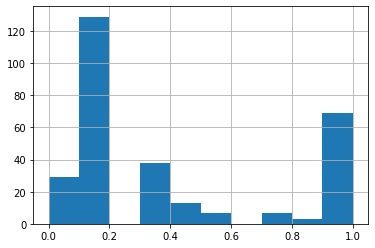

In [35]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [36]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [37]:
precision_score(y_test,y_pred)

0.8611111111111112

In [38]:
recall_score(y_test,y_pred)

0.5166666666666667

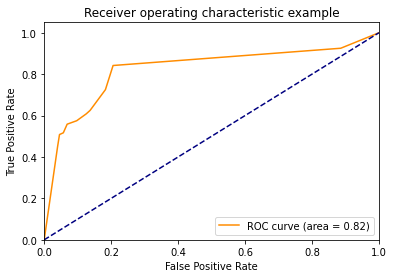

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Другие параметры дерева

In [40]:
clff = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf= 10)
clff.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

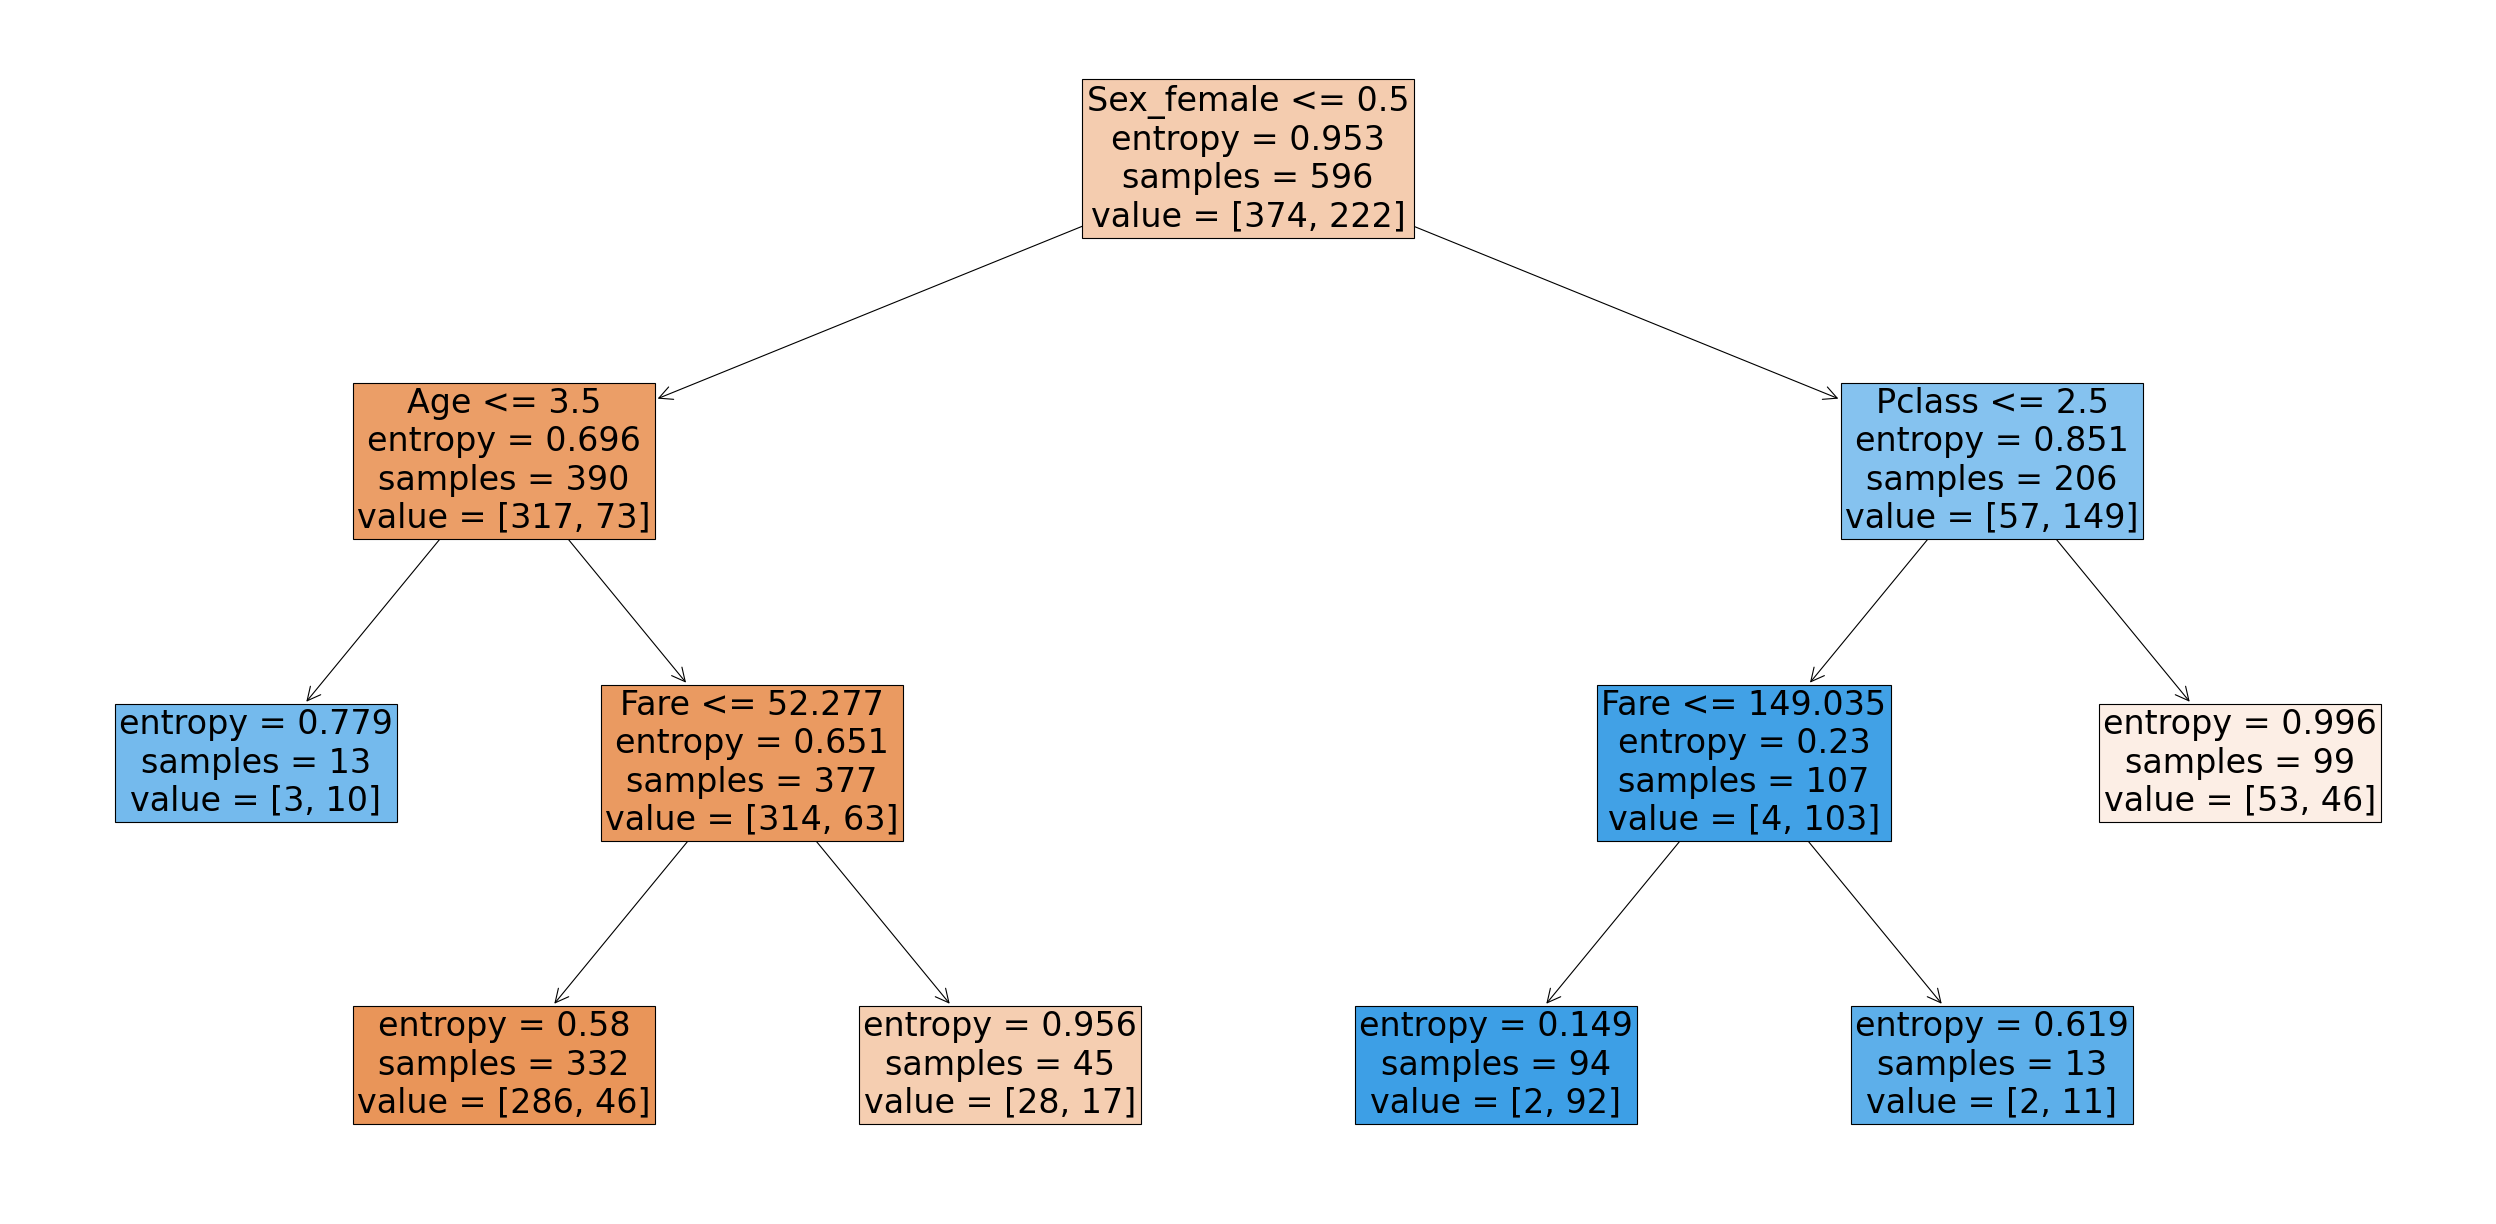

In [41]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clff, fontsize=30,filled=True,feature_names=list(X_train))

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf_rf = RandomForestClassifier()
parameters = {"n_estimators" : [10, 20 , 30], "max_depth" : [2,5,7,10]}

In [44]:
gridsearch_clf = GridSearchCV(clf_rf, parameters, cv = 5)
gridsearch_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [45]:
gridsearch_clf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [46]:
best_clf = gridsearch_clf.best_estimator_
best_clf

RandomForestClassifier(max_depth=5, n_estimators=20)

In [47]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [48]:
#по каким feature деревья делали сплит, чтобы добитсья максимального Information Gain (снижения энтропии)
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({"features": list(X_train),
                                       "feature_importances" : feature_importances})
feature_importances_df

,features,feature_importances
0,Pclass,0.142191
1,Age,0.105062
2,SibSp,0.026600
3,Parch,0.032056
4,Fare,0.134042
5,Sex_female,0.266965
6,Sex_male,0.236575
7,Embarked_C,0.016241
8,Embarked_Q,0.005379
9,Embarked_S,0.034888


In [49]:
feature_importances_df.sort_values("feature_importances", ascending = False)

,features,feature_importances
5,Sex_female,0.266965
6,Sex_male,0.236575
0,Pclass,0.142191
4,Fare,0.134042
1,Age,0.105062
9,Embarked_S,0.034888
3,Parch,0.032056
2,SibSp,0.026600
7,Embarked_C,0.016241
8,Embarked_Q,0.005379
